# Unsupervised Learners

In [504]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
os.environ["OMP_NUM_THREADS"] = "4"
from sklearn.cluster import KMeans, DBSCAN
from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import scipy.stats
from sklearn.neighbors import NearestNeighbors


In [528]:
# import the dataset we want 
# read preprocessed data
data = pd.read_csv("data1/imputed_dataset_20_missing.csv") 
if 'Unnamed: 0' in data.columns:
    data = data.drop(['Unnamed: 0'], axis=1)
if len(data) > 10000:
    data = data.sample(n = 10000, random_state=0)
# separate the predictors and the criterion variable
trainCrit = data['Heart_Disease']  
#data = data.drop('Heart_Disease', axis=1)  
data


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
119925,3.000000,5.000000,1.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.457718,1.000000,63.134056,158.405597,44.91000,19.330000,1.000000,2.0,16.000000,0.000000,16.000000
205900,3.992572,4.233143,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,21.000000,160.000000,72.57000,28.517291,0.000000,5.0,16.000000,4.000000,16.000000
272851,2.000000,5.000000,0.630557,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,72.000000,185.000000,106.59000,31.000000,0.561763,0.0,30.000000,16.000000,4.000000
277153,4.000000,4.000000,0.000000,0.0,0.000000,0.106900,0.000000,1.000000,1.000000,0.341192,72.000000,173.000000,68.49000,22.960000,1.000000,30.0,28.098372,30.000000,15.000000
294269,4.000000,5.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,72.000000,155.000000,61.23000,26.241204,0.000000,3.0,29.516214,1.000000,2.328178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142954,4.000000,2.000000,0.787886,0.0,0.000000,-0.080062,0.147962,0.000000,-0.051757,0.088065,27.000000,183.000000,124.74000,37.300000,0.353100,0.0,1.000000,2.000000,4.000000
170951,3.000000,4.418854,1.000000,0.0,0.000000,0.046499,1.000000,0.000000,0.000000,0.000000,38.366449,170.000000,73.55342,25.530000,0.000000,0.0,23.946446,4.000000,4.000000
205458,2.778192,5.000000,1.000000,1.0,0.000000,1.000000,0.000000,0.369911,0.529677,0.000000,72.000000,173.000000,92.08000,30.870000,1.000000,1.0,90.000000,60.000000,0.000000
248984,4.000000,5.000000,0.898183,0.0,0.193884,0.127023,0.000000,0.000000,1.000000,0.000000,72.000000,165.000000,81.65000,29.950000,0.000000,1.0,60.000000,30.000000,5.508648


In [506]:
data.mean(axis=0)

General_Health                    3.533741
Checkup                           4.614714
Exercise                          0.776089
Heart_Disease                     0.077800
Skin_Cancer                       0.096709
Other_Cancer                      0.096856
Depression                        0.204693
Diabetes                          0.141671
Arthritis                         0.323002
Sex                               0.514975
Age_Category                     54.573188
Height_(cm)                     170.694314
Weight_(kg)                      83.487014
BMI                              28.568442
Smoking_History                   0.404353
Alcohol_Consumption               5.012087
Fruit_Consumption                29.534825
Green_Vegetables_Consumption     15.166855
FriedPotato_Consumption           6.299407
dtype: float64

## 1. PCA

Variance captured by the first component: 14.51%
Variance captured by the second component: 12.98%


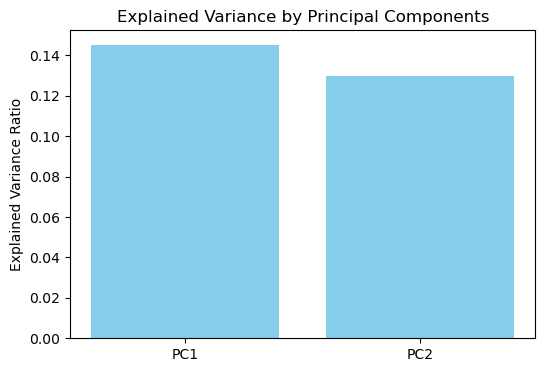

In [507]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
# Apply PCA with 2 components
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)
# Get explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
# Print the variance captured by each component
print(f"Variance captured by the first component: {explained_variance_ratio[0]:.2%}")
print(f"Variance captured by the second component: {explained_variance_ratio[1]:.2%}")
# Plot the explained variance for the two components
plt.figure(figsize=(6, 4))
plt.bar(['PC1', 'PC2'], explained_variance_ratio, color='skyblue')
plt.title('Explained Variance by Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

[0.4539236  0.35921529 0.28450978 0.23430045 0.23714307 0.3228463
 0.19849082 0.33724952 0.47096339 0.5364481  0.53534893 0.5715498
 0.72728364 0.60872151 0.24650842 0.18683156 0.28684697 0.23751852
 0.22710316]


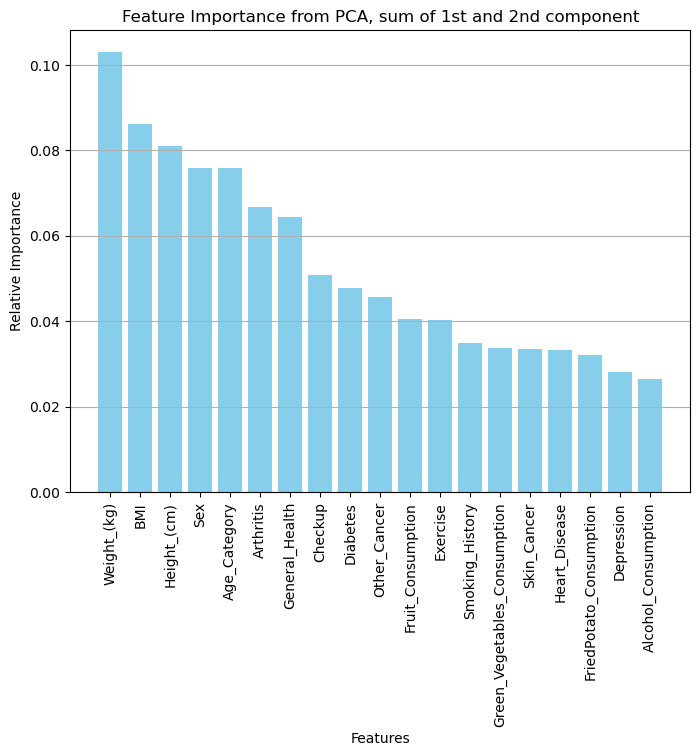

In [508]:
components = np.abs(pca.components_)  # Absolute value of eigenvectors
print(components.sum(axis=0))

# Compute total importance of each feature
feature_importance = components.sum(axis=0)
# Normalize importance (optional)
feature_importance_normalized = feature_importance / feature_importance.sum()
# Create a DataFrame for better visualization
importance_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_normalized
}).sort_values(by='Importance', ascending=False)

#print(importance_df)

# Plot feature importance
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.title('Feature Importance from PCA, sum of 1st and 2nd component')
plt.xlabel('Features')
plt.ylabel('Relative Importance')
plt.xticks(rotation=90)
plt.grid(axis='y')
plt.show()

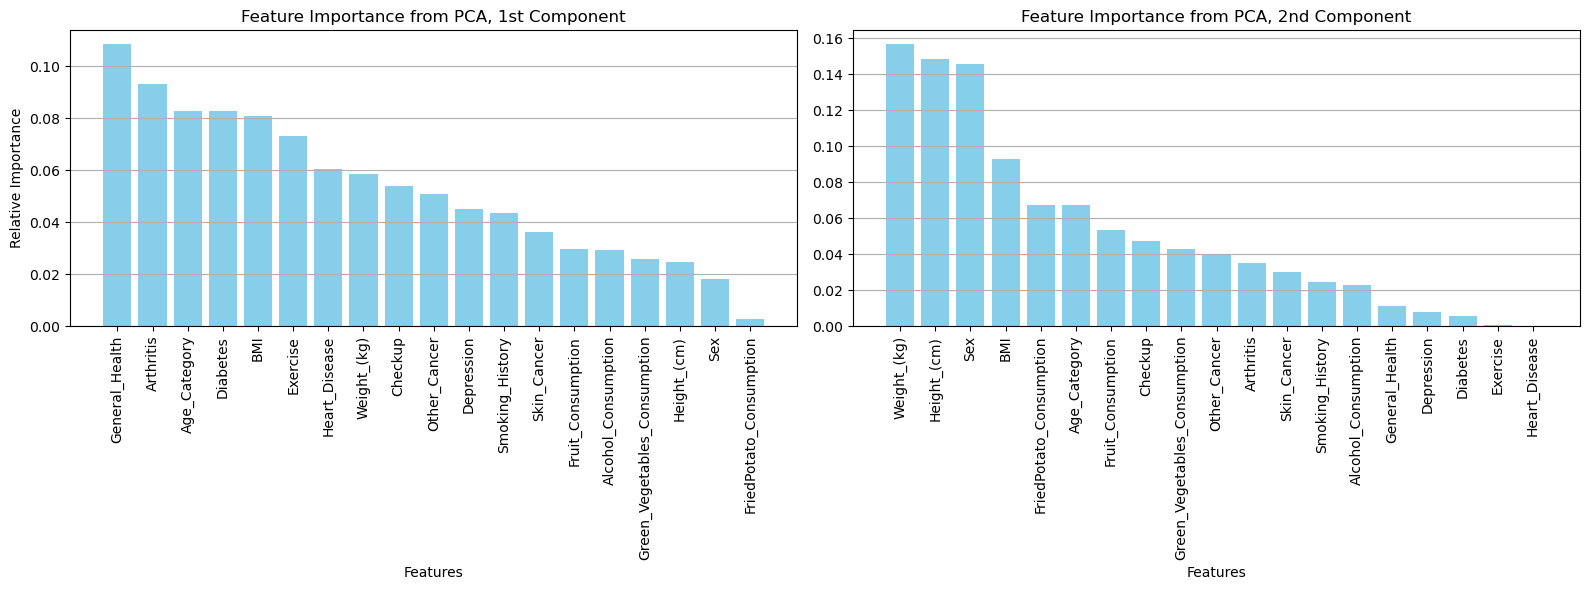

In [509]:
components = np.abs(pca.components_)  # Absolute value of eigenvectors
#print(components)

# Compute total importance of each feature
feature_importance_1 = components[0]
feature_importance_2 = components[1]
# Normalize importance (optional)
feature_importance_1_normalized = feature_importance_1 / feature_importance_1.sum()
feature_importance_2_normalized = feature_importance_2 / feature_importance_2.sum()
# Create a DataFrame for better visualization
importance_1_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_1_normalized
}).sort_values(by='Importance', ascending=False)

importance_2_df = pd.DataFrame({
    'Feature': data.columns,
    'Importance': feature_importance_2_normalized
}).sort_values(by='Importance', ascending=False)

#print(importance_df)

# Plot feature importance
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))

# Plot the first feature importance bar chart on the first axis
axes[0].bar(importance_1_df['Feature'], importance_1_df['Importance'], color='skyblue')
axes[0].set_title('Feature Importance from PCA, 1st Component')
axes[0].set_xlabel('Features')
axes[0].set_ylabel('Relative Importance')
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y')

# Plot the second feature importance bar chart on the second axis
axes[1].bar(importance_2_df['Feature'], importance_2_df['Importance'], color='skyblue')
axes[1].set_title('Feature Importance from PCA, 2nd Component')
axes[1].set_xlabel('Features')
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y')

# Adjust layout for better spacing
plt.tight_layout()

# Show the combined figure
plt.show()

## 2. K-means algorithm

### Find out the best k for k-means using the "elbow method"

In [510]:
# Normalize the data for kmeans implementation
data_kmeans = data.copy()
data_kmeans = data_kmeans.apply(lambda x: (x - x.min()) / (x.max() - x.min()))
data_kmeans

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
119925,0.500000,0.895077,0.786529,1.0,0.127861,0.097074,0.246627,0.236504,0.578620,0.626085,0.626331,0.511521,0.090165,0.067099,0.961403,0.135038,0.152750,0.000000,0.139109
205900,0.748143,0.723478,0.786529,0.0,0.127861,0.097074,0.246627,0.236504,0.223763,0.626085,0.142545,0.524590,0.225162,0.175440,0.084074,0.227712,0.152750,0.033333,0.139109
272851,0.250000,0.895077,0.495951,0.0,0.127861,0.097074,0.246627,0.236504,0.999036,0.235935,0.728130,0.729508,0.391198,0.204717,0.576925,0.073254,0.266803,0.133333,0.039775
277153,0.750000,0.671308,0.000000,0.0,0.127861,0.193596,0.246627,1.000000,0.999036,0.369051,0.728130,0.631148,0.205249,0.109906,0.961403,1.000000,0.251311,0.250000,0.130831
294269,0.750000,0.895077,0.786529,0.0,0.127861,0.097074,0.246627,0.236504,0.999036,0.626085,0.728130,0.483607,0.169816,0.148599,0.084074,0.165929,0.262862,0.008333,0.025936
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142954,0.750000,0.223769,0.619695,0.0,0.127861,0.024784,0.358098,0.236504,0.183638,0.270293,0.211437,0.713115,0.479781,0.279009,0.393859,0.073254,0.030551,0.016667,0.039775
170951,0.500000,0.765035,0.786529,0.0,0.127861,0.139059,1.000000,0.236504,0.223763,0.235935,0.341947,0.606557,0.229961,0.140212,0.084074,0.073254,0.217487,0.033333,0.039775
205458,0.444548,0.895077,0.786529,1.0,0.127861,1.000000,0.246627,0.518929,0.634408,0.235935,0.728130,0.631148,0.320381,0.203184,0.961403,0.104146,0.755601,0.500000,0.006664
248984,0.750000,0.895077,0.706447,0.0,0.296955,0.211766,0.246627,0.236504,0.999036,0.235935,0.728130,0.565574,0.269477,0.192335,0.084074,0.104146,0.511202,0.250000,0.052264


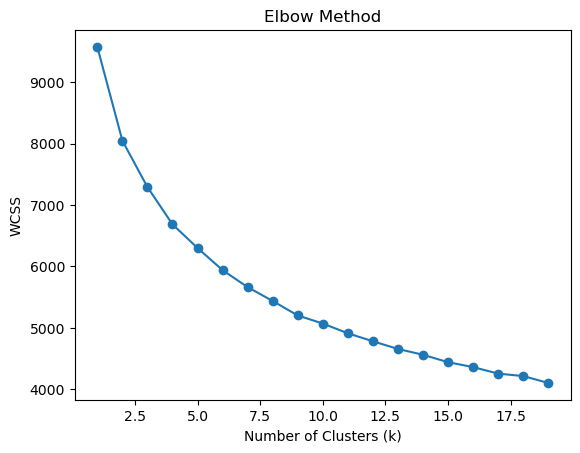

In [511]:
wcss = [] # wcss = Within-Cluster Sum of Squares, measures total variance within each cluster, which we aim to minimize
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # 10 rounds repeat (since performance dependend on random first centers)
    kmeans.fit(data_kmeans)
    wcss.append(kmeans.inertia_) # inertia is wcss for specific k
    
plt.plot(range(1, 20), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.show()

In [512]:

[wcss[i+2] - 2*wcss[i+1] + wcss[i] for i in range(len(wcss) - 2)]

[770.2657807469222,
 149.0703372753278,
 221.9876101998525,
 23.954154992095027,
 84.45972422633895,
 51.42115447462584,
 -10.907067250354885,
 105.3334014476286,
 -27.898548235579256,
 28.335624053504944,
 5.466110084593311,
 30.474148427972068,
 -26.37780108061179,
 41.01866314985273,
 -26.16742246938702,
 65.82692205278363,
 -71.13085266071448]

In [513]:
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

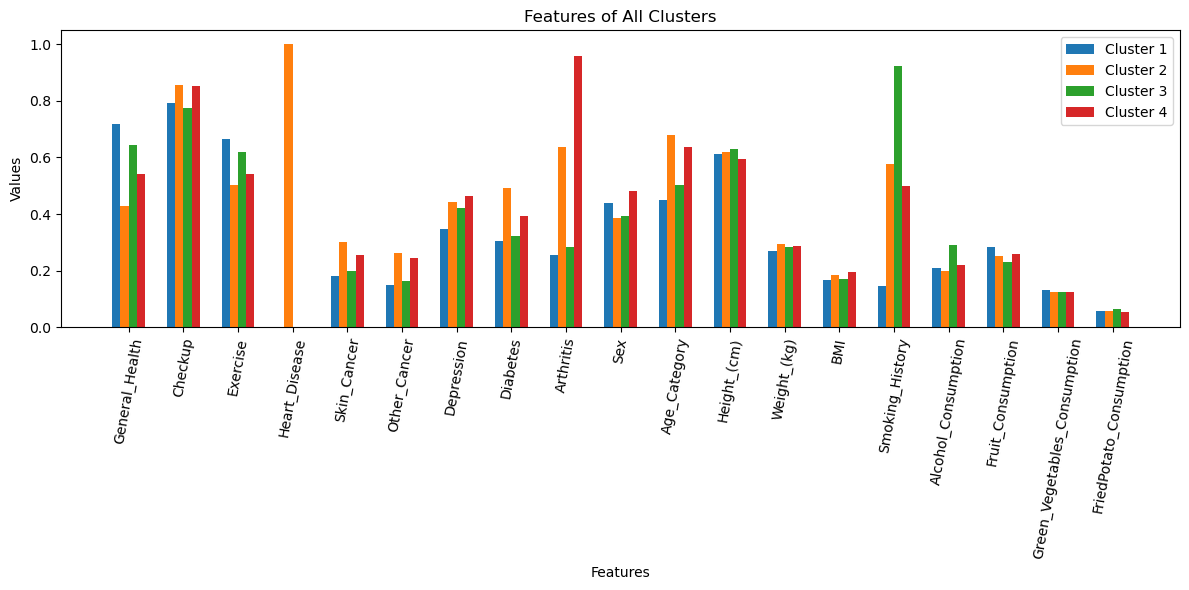

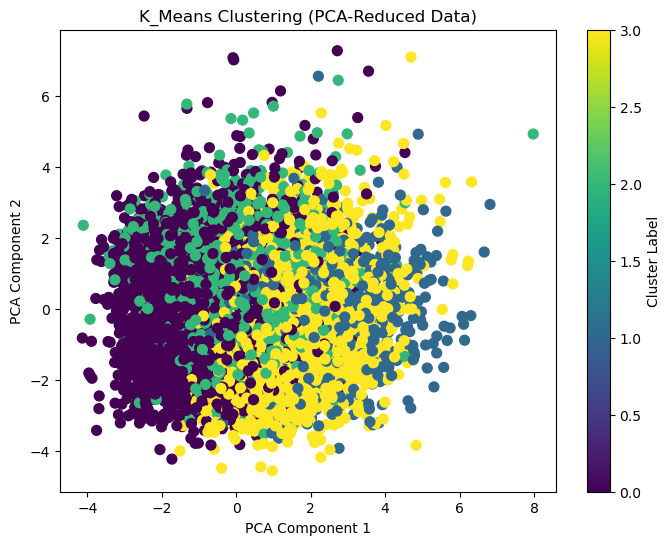

In [514]:
clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

num_clusters = len(clusters)
bar_width = 0.15  # Width of each bar
x_positions = np.arange(len(clusters[0]))  # Base x positions (for features)

plt.figure(figsize=(12, 6))  # Set figure size

# Loop through each cluster to plot its bars
for i in range(num_clusters):
    # Offset the x positions for each cluster's bars
    plt.bar(x_positions + i * bar_width, clusters[i], width=bar_width, label=f"Cluster {i+1}")

# Add titles, labels, and legend
plt.title("Features of All Clusters")
plt.xlabel("Features")
plt.ylabel("Values")
plt.xticks(x_positions + (num_clusters - 1) * bar_width / 2, clusters[0].index, rotation=80)  # Center tick labels
plt.legend()

plt.tight_layout()
plt.show()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
labels = data_kmeans['Cluster assignment']

# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', s=50)
plt.colorbar(label='Cluster Label')
plt.title("K_Means Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [515]:
dataKMeans = data.copy()
dataKMeans["KMeans_Cluster"] = data_kmeans['Cluster assignment']

summary = dataKMeans.groupby('KMeans_Cluster').mean().sort_values('Heart_Disease', ascending=False)
summary = data_kmeans.groupby('Cluster assignment').mean().sort_values('Heart_Disease', ascending=False)

determining_features = []
# Iterate through each cluster
for i in range(len(summary)):
    features = []  # List to store features for the current cluster
    for j in range(len(summary.columns)):
        # Check if the value is 1 or 0
        if summary.iloc[i, j] >= 0.99 or summary.iloc[i, j] <= 0.01:
            features.append(summary.columns[j])  # Add the feature name
    determining_features.append(features)  # Append the features list for the current cluster

# Add the new column with determining features to the DataFrame
summary['Determining features'] = determining_features
summary['Increased risk of heart disease (in %)'] = ((summary['Heart_Disease'] / np.mean(data['Heart_Disease']) - 1) * 100).round(0)
summary['Count'] = dataKMeans.groupby('KMeans_Cluster').count()['General_Health']
summary.round(3)

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Determining features,Increased risk of heart disease (in %),Count
Cluster assignment,,,,,,,,,,,,,,,,,,,,,
1,0.429,0.858,0.504,1.0,0.301,0.261,0.442,0.491,0.639,0.387,...,0.293,0.185,0.576,0.197,0.250,0.122,0.058,[Heart_Disease],1185.0,778
0,0.717,0.793,0.664,0.0,0.179,0.147,0.347,0.303,0.257,0.440,...,0.268,0.167,0.147,0.208,0.284,0.131,0.058,[Heart_Disease],-100.0,4482
2,0.644,0.774,0.620,0.0,0.199,0.162,0.422,0.322,0.284,0.393,...,0.284,0.172,0.925,0.290,0.232,0.123,0.065,[Heart_Disease],-100.0,2158
3,0.541,0.852,0.541,0.0,0.255,0.245,0.465,0.391,0.961,0.482,...,0.288,0.193,0.498,0.220,0.257,0.122,0.054,[Heart_Disease],-100.0,2582


In [516]:
pd.crosstab(data_kmeans['Cluster assignment'], trainCrit)

Heart_Disease,0.0,1.0
Cluster assignment,,
0,4482,0
1,0,778
2,2158,0
3,2582,0


Smoking_History                 0.482580
Arthritis                       0.339662
Age_Category                    0.092512
Depression                      0.084859
Alcohol_Consumption             0.044837
Other_Cancer                    0.043246
Skin_Cancer                     0.031949
Diabetes                        0.028455
Weight_(kg)                     0.014570
BMI                             0.014011
Checkup                         0.013759
Sex                             0.009054
FriedPotato_Consumption         0.001161
Height_(cm)                    -0.003142
Green_Vegetables_Consumption   -0.007277
Fruit_Consumption              -0.033101
Exercise                       -0.063658
General_Health                 -0.086193
Heart_Disease                  -0.147909
dtype: float64


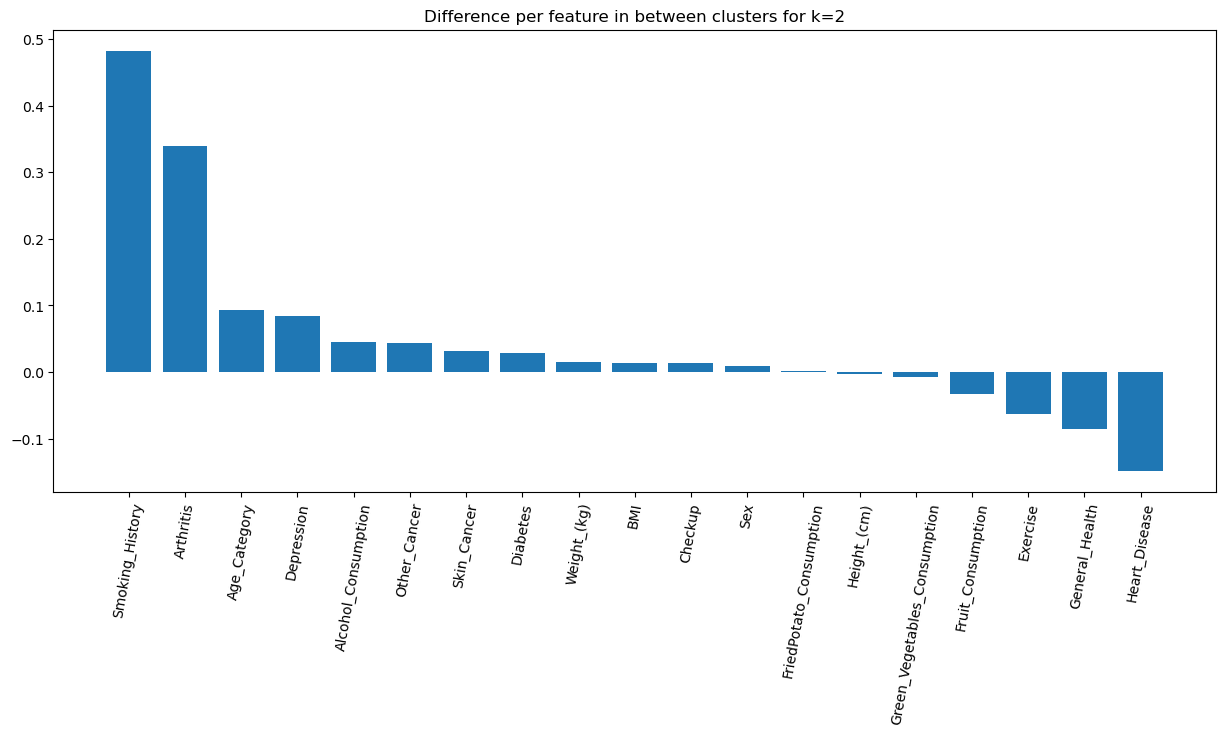

In [517]:
# only possible if k=2
# The optimal point for k seems to be k=3
kmeans = KMeans(n_clusters=2, random_state=13, n_init=10)
# Fit the model
kmeans.fit(data_kmeans)
# Get the cluster assignments
y_kmeans = kmeans.predict(data_kmeans)
data_kmeans['Cluster assignment'] = y_kmeans

clusters = []
for i in range(0, max(data_kmeans['Cluster assignment']) + 1):
    clusters.append(np.mean(data_kmeans[data_kmeans['Cluster assignment'] == i], axis=0)[:-1])

# get difference
s1, s2 = clusters    
difference = s2 -s1

difference = difference.sort_values(ascending=False)
print(difference)

#x_position = list(difference.index).index("Green_Vegetables_Consumption")-0.5
#print(x_position)
plt.figure(figsize=(15, 6))
plt.bar(difference.index, difference)
#plt.axvline(x=x_position, color='red', linestyle='--', linewidth=2)
plt.title(f"Difference per feature in between clusters for k=2")
plt.xticks(rotation=80)  # Rotate the labels 45 degrees
plt.show()

In [518]:
#scipy.stats.spearmanr(data_kmeans['Cluster assignment'], trainCrit).correlation   # Spearman's rho

In [519]:
dataKMeans = data.copy()
dataKMeans["KMeans_Cluster"] = data_kmeans['Cluster assignment']
summariesGrouped = dataKMeans.groupby("KMeans_Cluster").agg(["mean"])
summariesGrouped

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
KMeans_Cluster,,,,,,,,,,,,,,,,,,,
0,3.697164,4.585569,0.814453,0.147909,0.079345,0.074153,0.151302,0.124005,0.115334,0.503975,50.754146,170.876019,82.072009,28.005266,0.143627,4.324103,31.460761,15.580773,6.232954
1,3.352390,4.647055,0.733517,0.000000,0.115978,0.122049,0.263941,0.161274,0.553452,0.527182,58.811197,170.492674,85.057252,29.193402,0.693682,5.775547,27.397606,14.707529,6.373149


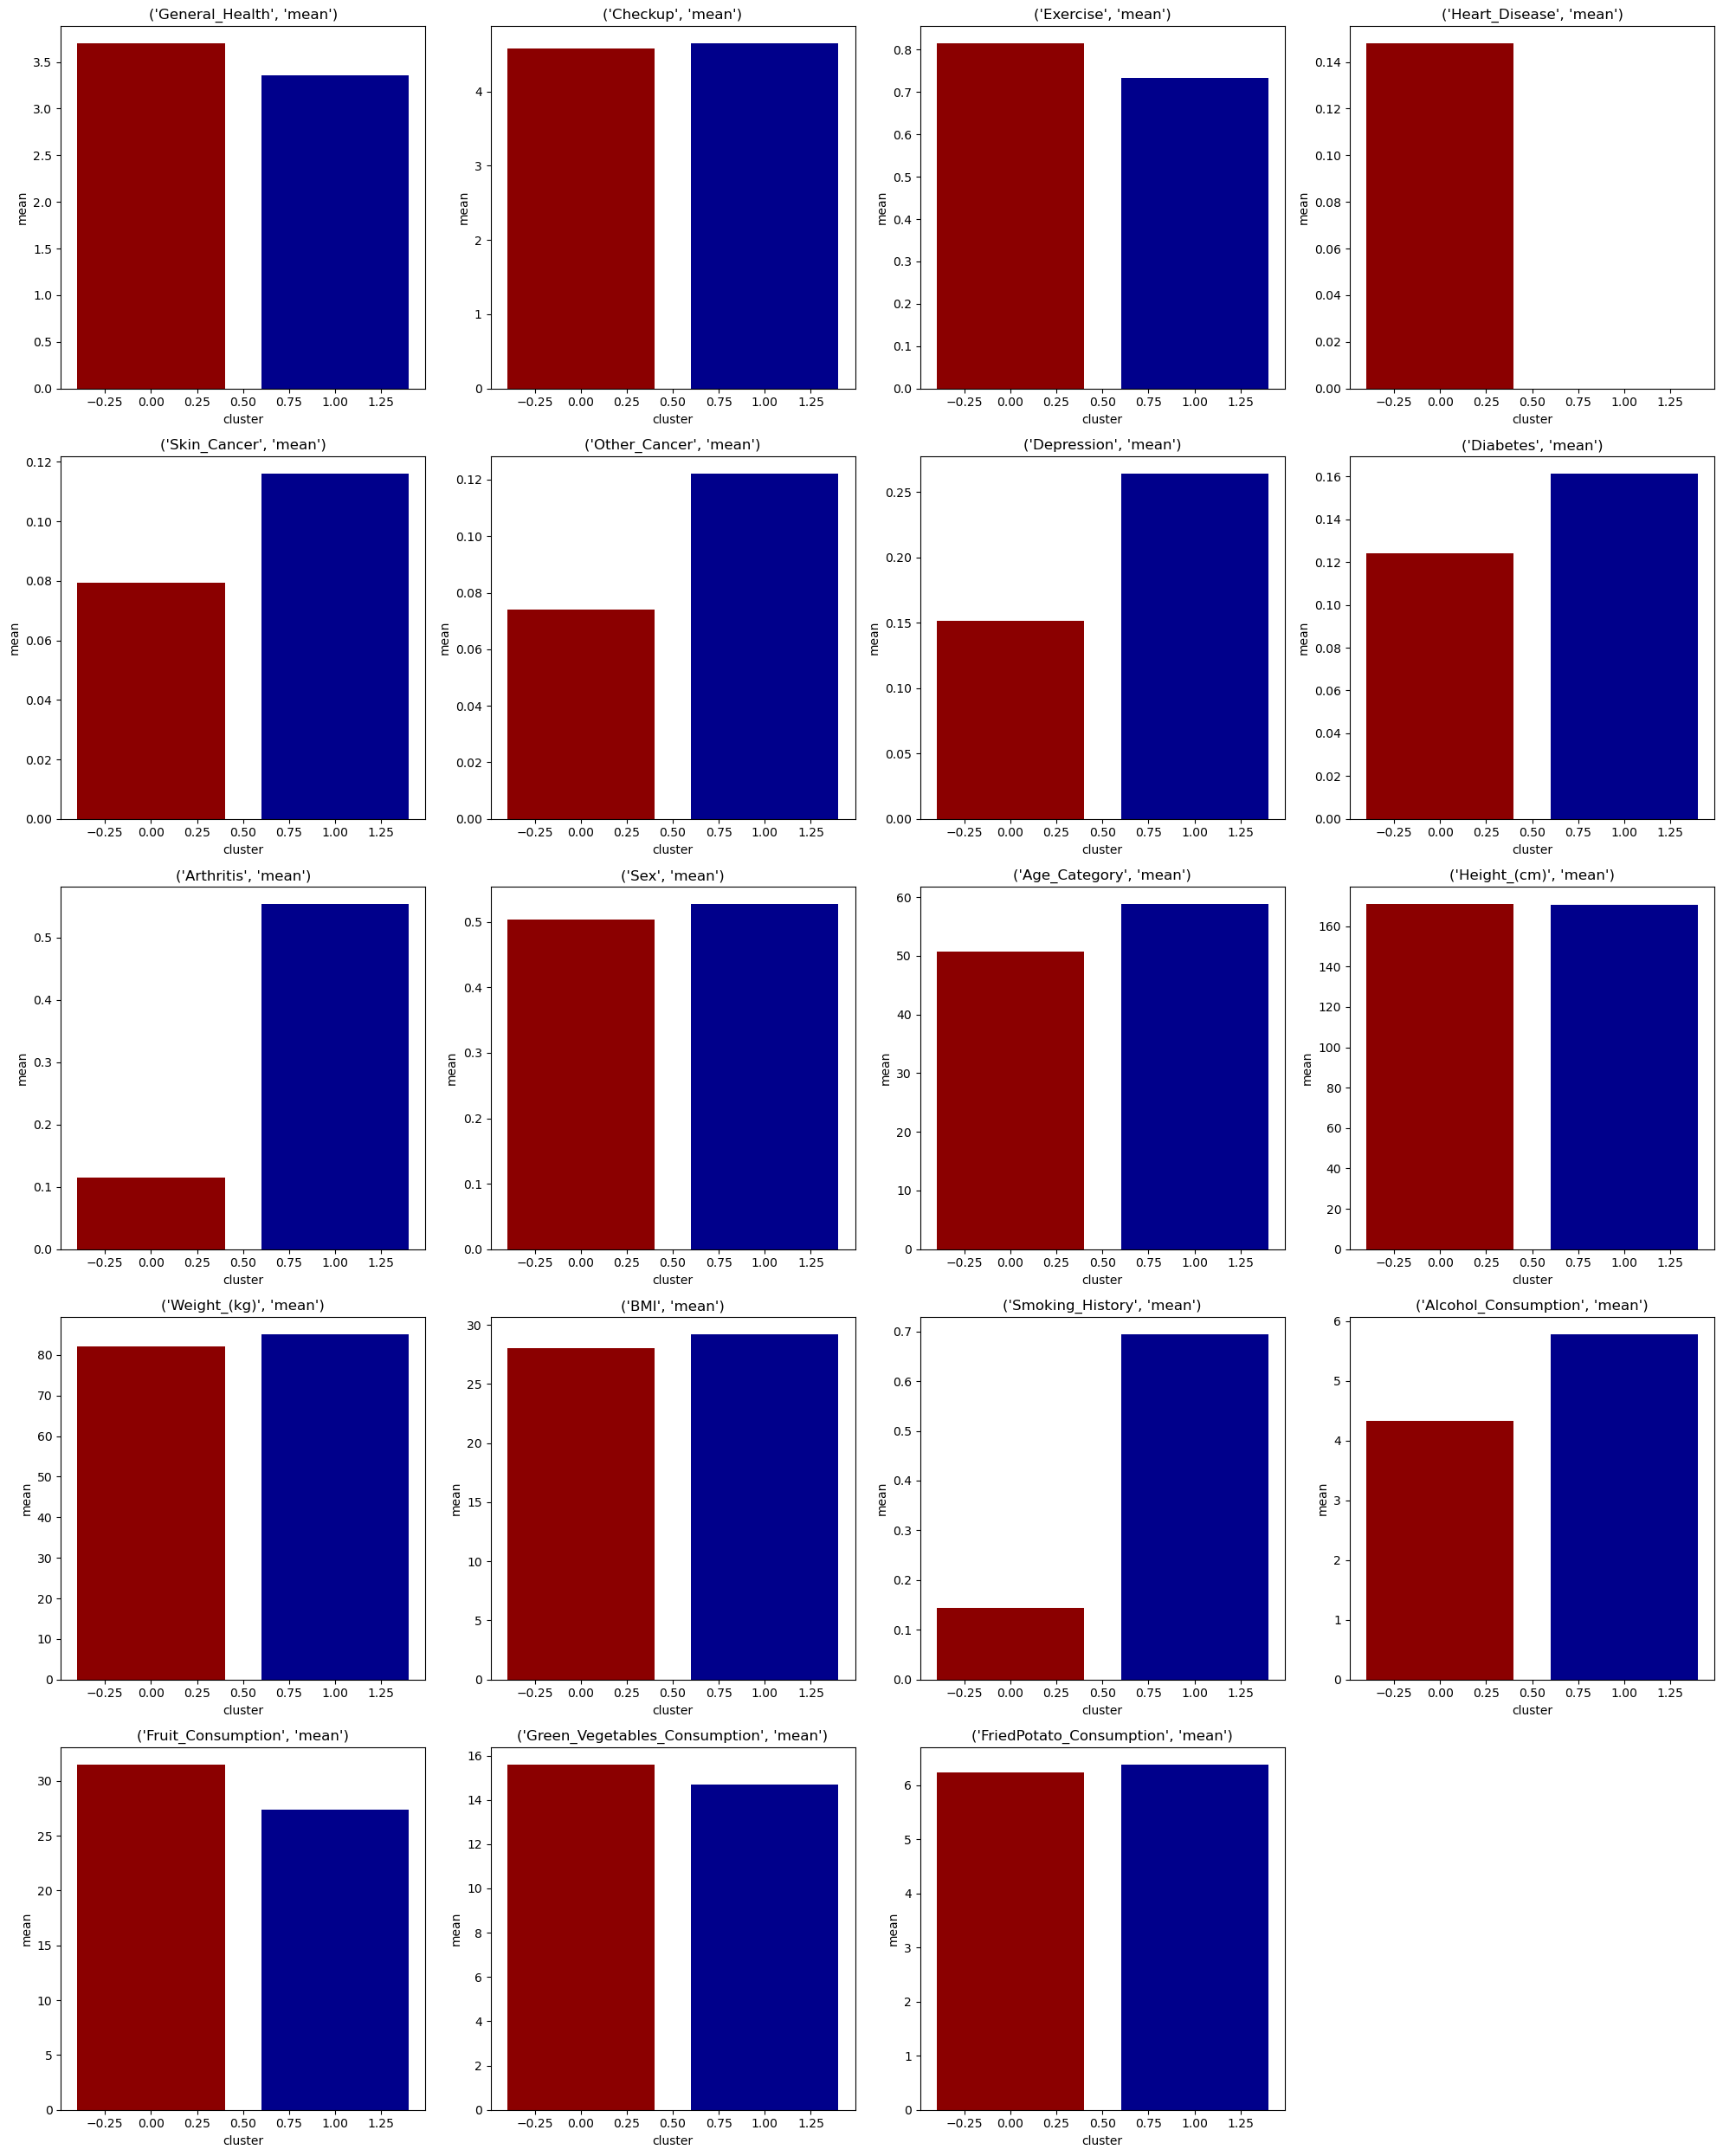

In [520]:
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(20, 25))  
axes = axes.flatten()
for i, col in enumerate(summariesGrouped.columns):
    axes[i].bar(summariesGrouped.index[0], summariesGrouped[col].iloc[0], color='darkred')  # First bar
    axes[i].bar(summariesGrouped.index[1], summariesGrouped[col].iloc[1], color='darkblue')
    #axes[i].bar(summariesGrouped.index, summariesGrouped[col])  # Bar plot for each feature
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('cluster')
    axes[i].set_ylabel('mean')

for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()

# 3. DBSCAN algorithm

In [521]:
# ???
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data)
X_pca.shape

(10000, 2)

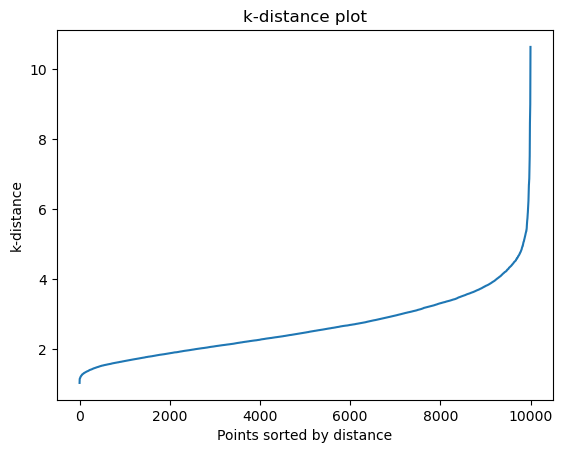

In [522]:
neighbors = NearestNeighbors(n_neighbors=20)
neighbors_fit = neighbors.fit(X)  # X is your dataset
distances, _ = neighbors_fit.kneighbors(X)

# Sort distances
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.ylabel("k-distance")
plt.xlabel("Points sorted by distance")
plt.title("k-distance plot")
plt.show()

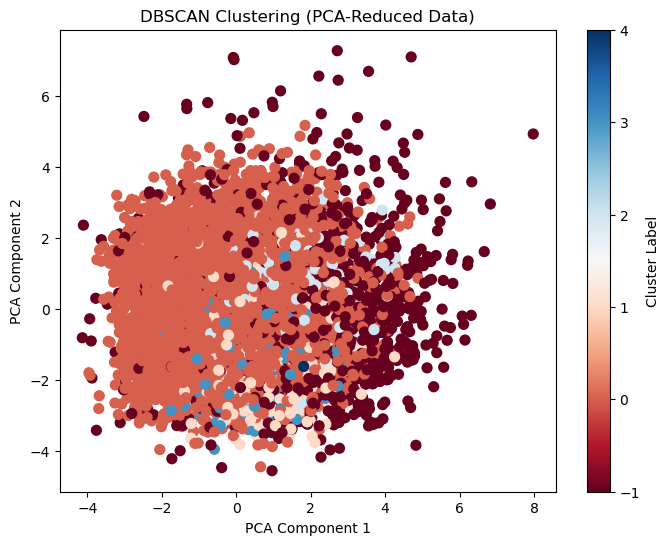

In [523]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)
X = np.array(scaled_data)
#X, _ = make_blobs(n_samples=200, n_features=19, centers=3, random_state=42)

dbscan = DBSCAN(eps=3.0, min_samples=20)
labels = dbscan.fit_predict(X)
# Reduce to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='RdBu', s=50)
plt.colorbar(label='Cluster Label')
plt.title("DBSCAN Clustering (PCA-Reduced Data)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [524]:
columnsNewOrder = ['Heart_Disease', 'Alcohol_Consumption', 'Other_Cancer', 'Skin_Cancer','Depression', 'Diabetes',
                   'Smoking_History',  'Arthritis', 'Fruit_Consumption',
                    'Green_Vegetables_Consumption', 'FriedPotato_Consumption',
                    'Sex', 'General_Health', 'Exercise', 'Checkup',   
                    'Age_Category', 'Height_(cm)', 'Weight_(kg)', 'BMI', ]

In [525]:
dataOrder = data.copy()
dataOrder["DBSCAN_Cluster"] = labels
summariesGrouped = dataOrder.groupby("DBSCAN_Cluster").agg(["mean"])

determining_features = []
# Iterate through each cluster
for i in range(len(summariesGrouped)):
    features = []  # List to store features for the current cluster
    for j in range(len(summariesGrouped.columns)):
        # Check if the value is 1 or 0
        if summariesGrouped.iloc[i, j] >= 0.99 or summariesGrouped.iloc[i, j] <= 0.01:
            features.append(summariesGrouped.columns[j])  # Add the feature name
    determining_features.append(features)  # Append the features list for the current cluster

summariesGrouped['Determining features'] = determining_features
summariesGrouped['Increased risk of heart disease (in %)'] = ((summary['Heart_Disease'] / np.mean(data['Heart_Disease']) - 1) * 100).round(0)
summariesGrouped['Count'] = dataOrder.groupby("DBSCAN_Cluster").count()['General_Health']
summariesGrouped

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,...,Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption,Determining features,Increased risk of heart disease (in %),Count
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,...,mean,mean,mean,mean,mean,mean,mean,,,
DBSCAN_Cluster,,,,,,,,,,,,,,,,,,,,,
-1,2.859211,4.580313,0.557970,0.342466,0.300922,0.326404,0.378030,0.356068,0.533940,0.498942,...,90.116254,30.984119,0.529929,6.506634,32.526812,20.794416,10.075274,"[(General_Health, mean), (Checkup, mean), (Age...",NaN,1314
0,3.661039,4.582854,0.806481,0.000000,0.015898,0.016500,0.193273,0.107906,0.272854,0.524208,...,82.833729,28.335421,0.375730,4.854419,29.091122,14.337407,5.870314,"[(General_Health, mean), (Checkup, mean), (Hea...",-100.0,7603
1,3.411295,4.876852,0.806646,0.000000,0.123571,1.000000,0.069662,0.056952,0.439691,0.632911,...,77.966557,27.337239,0.403798,4.057530,29.485872,13.860345,4.134645,"[(General_Health, mean), (Checkup, mean), (Hea...",1185.0,384
2,3.026590,4.921321,0.823486,1.000000,0.036985,0.031560,0.085264,0.292037,0.452872,0.250624,...,85.423445,28.195074,0.558826,2.965565,25.982815,13.134545,5.137673,"[(General_Health, mean), (Checkup, mean), (Hea...",-100.0,307
3,3.875863,4.845135,0.852085,0.000000,1.000000,0.053865,0.073227,0.042153,0.372352,0.502854,...,77.597472,26.449642,0.415103,5.722716,31.377508,15.366831,4.982879,"[(General_Health, mean), (Checkup, mean), (Hea...",-100.0,371
4,3.261247,4.955481,0.826595,1.000000,1.000000,0.025523,0.030925,0.059929,0.376110,0.097513,...,81.891516,27.184558,0.471713,3.398271,23.231781,13.410330,5.216207,"[(General_Health, mean), (Checkup, mean), (Hea...",NaN,21


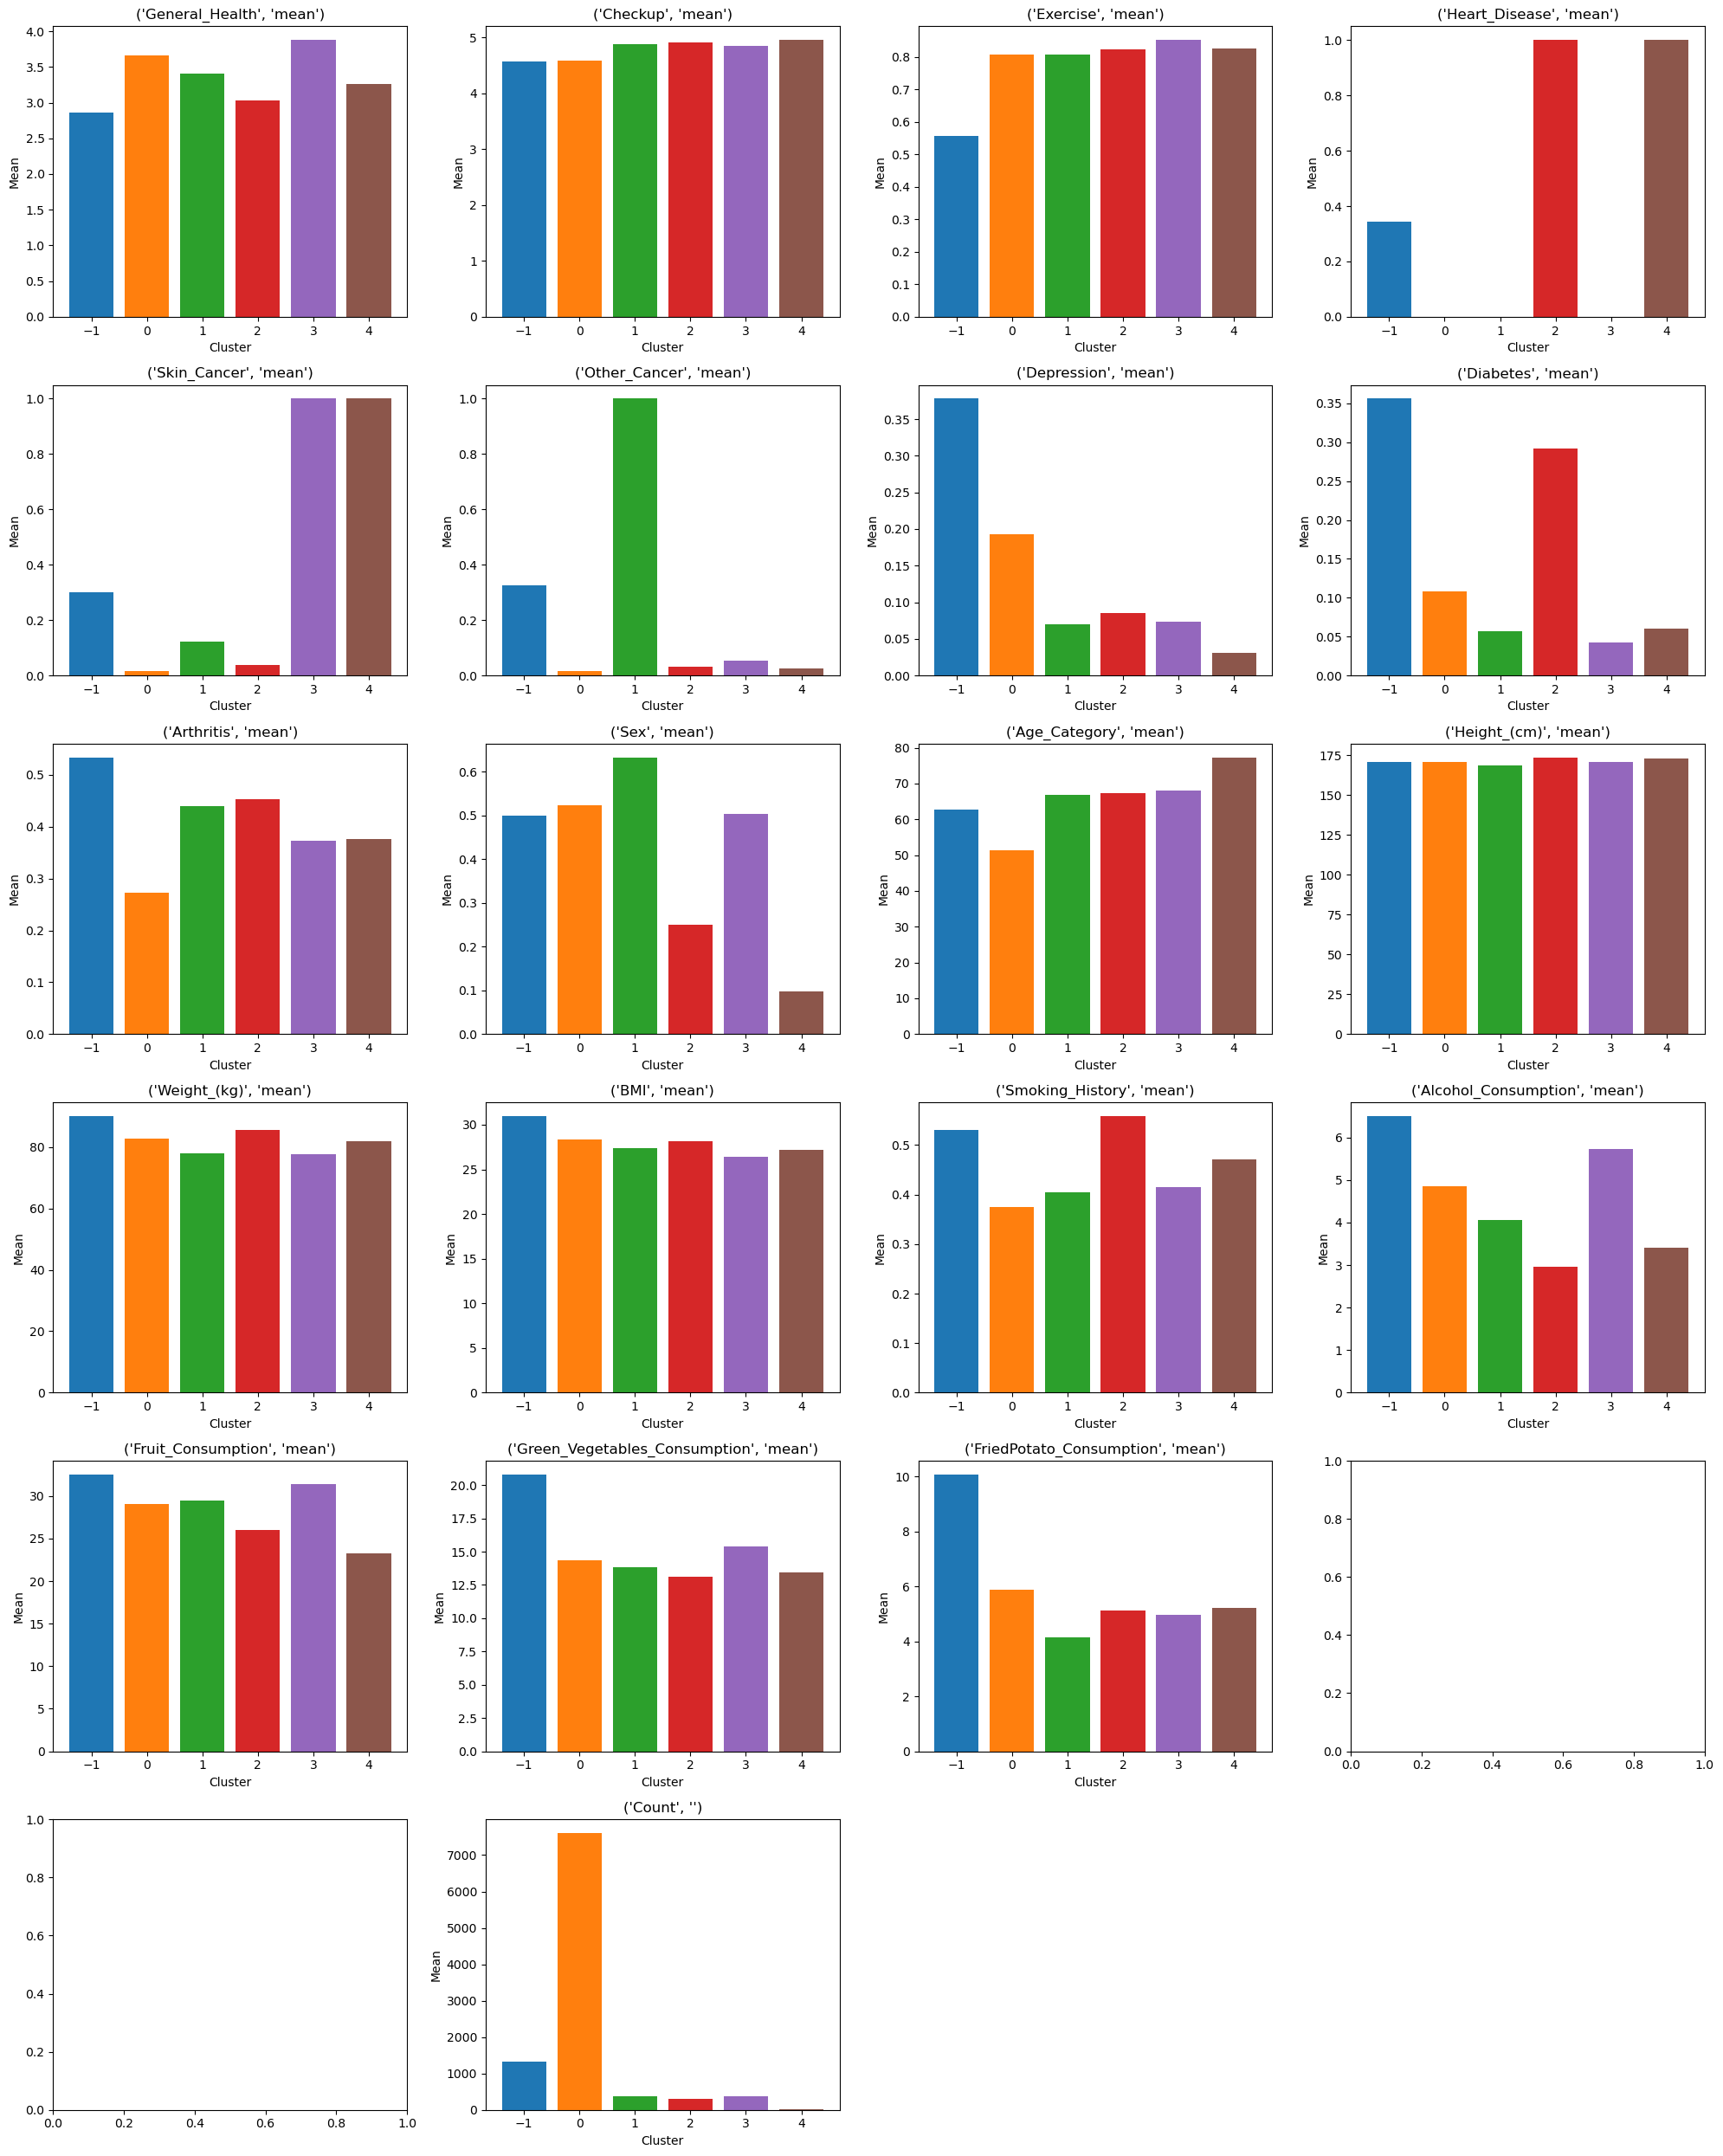

In [526]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(20, 25))  
axes = axes.flatten()

# List of columns to exclude
exclude_cols = summariesGrouped.columns[-3:-1]  # Last two columns

for i, col in enumerate(summariesGrouped.columns):
    if col in exclude_cols:  # Skip second-to-last and third-to-last columns
        continue
    
    for j in range(len(summariesGrouped)):
        axes[i].bar(summariesGrouped.index[j], summariesGrouped[col].iloc[j])  # First bar
    
    axes[i].set_title(col)  # Title for each subplot
    axes[i].set_xlabel('Cluster')
    axes[i].set_ylabel('Mean')

# Turn off unused axes
for j in range(i + 1, len(axes)):
    axes[j].axis('off')
    
plt.tight_layout()
plt.show()